This notebook implements an artificial neuron for logistic regression.

<small>The following was produced by following the “Deep Learning” course on the <a href="https://www.youtube.com/@MachineLearnia" target="_blank">Machine Learnia YouTube channel</a>.</small>


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

X shape: (100, 2), Y shape: (100, 1)


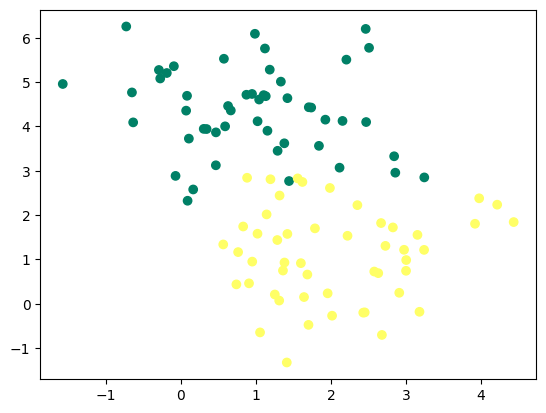

In [145]:
X,Y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
Y=Y.reshape((Y.shape[0],1)) 
print(f"X shape: {X.shape}, Y shape: {Y.shape}")
plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer')
plt.show()

In [146]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return(W,b)

In [147]:
def model(X,W,b):
    Z = X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return(A)

In [148]:
def log_loss(A,Y):
    return(-1/len(Y)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))

In [149]:
def gradients(A,X,Y):
    dw = 1/len(Y)*X.T.dot(A-Y)
    db = 1/len(Y)*np.sum(A-Y)
    return(dw,db)


In [150]:
def update(W,b,dw,db,lr):
    W += -lr*dw
    b += -lr*db
    return(W,b)

In [151]:
# we see A as the probability for y=1
def predict(X,W,b):
    A = model(X,W,b)
    return A >= 0.5

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
def artificial_neuron(X,Y,lr=0.1,n_iter=100):
    W,b = initialisation(X)
    Loss = []

    for i in range(n_iter):
        A = model(X,W,b)
        Loss.append(log_loss(A,Y))
        dw,db = gradients(A,X,Y)
        W,b = update(W,b,dw,db,lr)

    Y_pred = predict(X,W,b)
    print(accuracy_score(Y, Y_pred))
    
    plt.plot(Loss)
    plt.show()

    return(W,b)
    
    

0.92


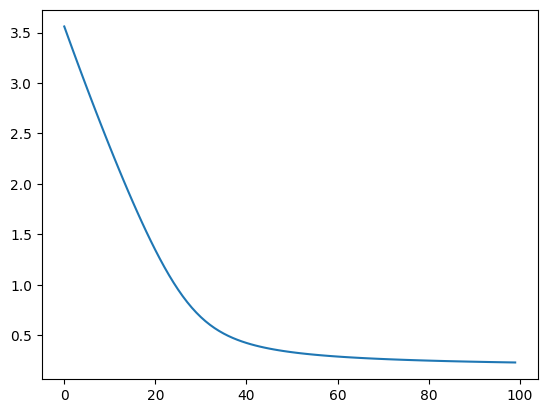

In [154]:
W,b = artificial_neuron(X,Y)

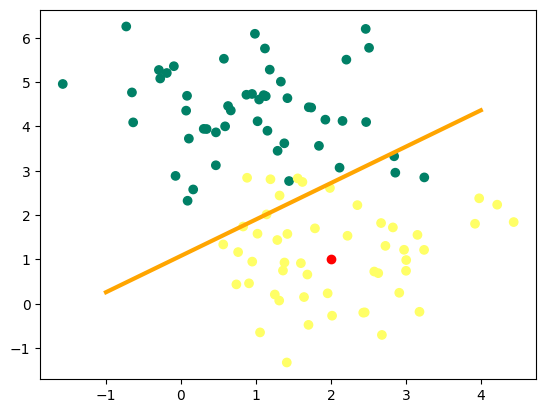

In [155]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0]*x0-b)/W[1]

plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)

plt.show()

In [156]:
predict(new_plant, W, b)

array([ True])